# Web Search and Ranking

#### Prof. Claudio Lucchese

# A new Task

You are a Web search engine, your task is to design a function for ranking documents to best answer a given query.

# Data Mining Methodology

[Domingos, Pedro. "**A few useful things to know about machine learning.**" Communications of the ACM 55.10 (2012): 78-87.]

We need three main ingredients:

1. **Evaluation**
   - How are you going to evaluate your results?
   - Is the evaluation function what you really want to achieve?
   - Is it optimizable? Is it feasible? Will you have the data for that? Etc. etc.
   - Did you formalize well the problem you are going to solve?


2. **Machine Learning Algorithm**
   - Hypothesis space: linear combination, mixture models, decision tree, association rules, …
   - Optimization strategy, i.e., search strategy to find the best hypothesis: closed formula, greedy, bounded approximation, …
   

3. **The data**
   - Do you have the data to run your algo and evaluate your model ?
   - Is your data clean? Un-biased? Etc.

### Classifier/Regressor approach

We are given a collection $D$ of documents $d_i$.

Let's encode $d_i$ into a feature vector $x$:
 - e.g., $d_i$ is the tf-idf vector

Build a training dataset: 
$$
{\cal D} = \{ (d_1, y_1), (d_2, y_2), \ldots\}
$$

where $y_{1} = 1$ if $d_i$ is *relevant* and $0$ otherwise.

Train a binary classifier $h$.

Let the score of document $s(d_i)$ be probability $h(y=1|d_i)$ estimated by the classifier of $d_i$ belonging to class 1.

Repeat for each candidate document and rank documents according to $s(d_i)$.


Typically, we have multiple relevance labels, e.g., $y\in\{0,1,2,3,4\}$, and therefore a regression model is more appropriate.


### Binary Classifier

We are given a collection $R$ of document pairs $(d_i,d_j)$.

Let's encode $(d_i,d_j)$ into a feature vector $x_{ij}$:
 - e.g., if $d_i$ is the tf-idf vector then $x=d_i-d_j$.
 

Build a training dataset: 
$$
{\cal D} = \{ ( \langle d_1,d_2\rangle, y_{12}), ( \langle d_1,d_3\rangle, y_{13}), \ldots\}
$$
$$
{\cal D} = \{ ( x_{12}, y_{12}), ( x_{13}, y_{13}), \ldots\}
$$

where $y_{ij} = 1$ if $d_i$ is better than $d_j$ and $0$ otherwise.

Train a binary classifier $h$.

Assign to document $d_i$ the score $s(d_i) = \sum_{d_j} h(x_{ij})$,
where $h(x_{ij})$ is the probability estimated by the classifier of $x_{ij}$ belonging to class 1.

Repeat for each candidate document and rank documents according to $s(d_i)$.



### Normalized Discounted Cumulative Gain NDCG@K

Assume non-binary relevance labeling (typically 0-4).

Consider only the top-K ranked documents, and sum up (**cumulate**) their contribution, i.e., the **gain** in quality.

The contribution/gain of a result depends on its relevance label.

Contribution is diminished (**discounted**) if the result is in the "bottom" positions.

Normalize between 0 and 1

$$Gain(d) = 2^y-1$$

$$Discount(r) = \frac{1}{\log(r+1)}$$

$$DGG@k = \sum_{ranks r=1..k} Gaind(d^r) \cdot Discount(r) $$

$$NDGG@k = \frac{DGG@k}{IDCG@k} $$

How sensitive is NDCG@K?

 - “major revisions of the web search rankers [Bing] ... The differences between these rankers involve changes of over half a percentage point, in absolute terms, of NDCG”
   - [CJRY12] Olivier Chapelle, Thorsten Joachims, Filip Radlinski, and Yisong Yue. Large-scale validation and analysis of interleaved search evaluation. ACM Transactions on Information Systems (TOIS), 30(1):6, 2012.



## Remarks

Note that none of the above directly optimizes NDCG@k.

Today, this is still a challenging task!

### Data Labeling

Generating the $y$ values (ratings) is the most difficult part of the training dataset generation.

This involves users' feedback
- Explicit
  - Ask users to rate result
    - (by the page or by the snippet)
- Implicit
  - Process logs to get information about: 
    - Clicks
    - Query reformulation
- Fancier...
  - Eye tracking
    - Fixation: spatially stable gaze lasting for approximately 200–300 ms
    

- User Feedback when swapping the top 2 results


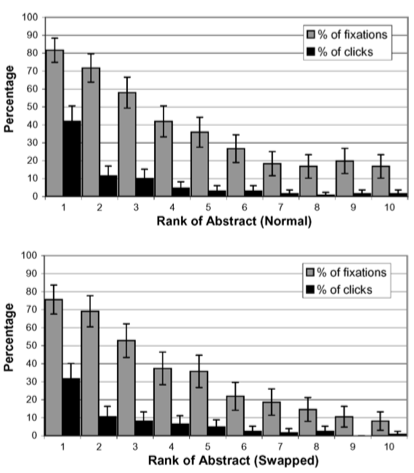    

## Data Features

https://www.microsoft.com/en-us/research/project/mslr/



#### Feature List of Microsoft Learning to Rank Datasets 

 |feature id |    feature description |      stream | comments | 
 |--|--|--|--|
 |1 |    covered query term number |      body |  | 
 |2 |      | anchor | 
 |3 |      | title | 
 |4 |      | url | 
 |5 |      | whole document | 
 |6 |    covered query term ratio |      body | 
 |7 |      | anchor | 
 |8 |      | title | 
 |9 |      | url | 
 |10 |     |  whole document | 
 |11 |    stream length |      body | 
 |12 |      | anchor | 
 |13 |      | title | 
 |14 |      | url | 
 |15 |      | whole document | 
 |16 |    IDF(Inverse document frequency) |      body | 
 |17 |      | anchor | 
 |18 |      | title | 
 |19 |      | url | 
 |20 |      | whole document | 
 |21 |    sum of term frequency |      body | 
 |22 |      | anchor | 
 |23 |      | title | 
 |24 |      | url | 
 |25 |      | whole document | 
 |26 |    min of term frequency |      body | 
 |27 |      | anchor | 
 |28 |      | title | 
 |29 |      | url | 
 |30 |      | whole document | 
 |31 |    max of term frequency |      body | 
 |32 |      | anchor | 
 |33 |      | title | 
 |34 |      | url | 
 |35 |      | whole document | 
 |36 |    mean of term frequency |      body | 
 |37 |      | anchor | 
 |38 |      | title | 
 |39 |      | url | 
 |40 |      | whole document | 
 |41 |    variance of term frequency |      body | 
 |42 |      | anchor | 
 |43 |      | title | 
 |44 |      | url | 
 |45 |      | whole document | 
 |46 |    sum of stream length normalized term frequency |      body | 
 |47 |      | anchor | 
 |48 |      | title | 
 |49 |      | url | 
 |50 |      | whole document | 
 |51 |    min of stream length normalized term frequency |      body | 
 |52 |      | anchor | 
 |53 |      | title | 
 |54 |      | url | 
 |55 |      | whole document | 
 |56 |    max of stream length normalized term frequency |      body | 
 |57 |      | anchor | 
 |58 |      | title | 
 |59 |      | url | 
 |60 |      | whole document | 
 |61 |    mean of stream length normalized term frequency |      body | 
 |62 |      | anchor | 
 |63 |      | title | 
 |64 |      | url | 
 |65 |      | whole document | 
 |66 |    variance of stream length normalized term frequency |      body | 
 |67 |      | anchor | 
 |68 |      | title | 
 |69 |      | url | 
 |70 |      | whole document | 
 |71 |    sum of tf$*$idf |      body | 
 |72 |      | anchor | 
 |73 |      | title | 
 |74 |      | url | 
 |75 |      | whole document | 
 |76 |    min of tf$*$idf |      body | 
 |77 |      | anchor | 
 |78 |      | title | 
 |79 |      | url | 
 |80 |      | whole document | 
 |81 |    max of tf$*$idf |      body | 
 |82 |      | anchor | 
 |83 |      | title | 
 |84 |      | url | 
 |85 |      | whole document | 
 |86 |    mean of tf$*$idf |      body | 
 |87 |      | anchor | 
 |88 |      | title | 
 |89 |      | url | 
 |90 |      | whole document | 
 |91 |    variance of tf$*$idf |      body | 
 |92 |      | anchor | 
 |93 |      | title | 
 |94 |      | url | 
 |95 |      | whole document | 
 |96 |    boolean model |      body |  | 
 |97 |      | anchor | 
 |98 |      | title | 
 |99 |      | url | 
 |100 |     |  whole document | 
 |101 |    vector space model |      body | 
 |102 |      | anchor | 
 |103 |      | title | 
 |104 |      | url | 
 |105 |      | whole document | 
 |106 |    BM25 |      body | 
 |107 |      | anchor | 
 |108 |      | title | 
 |109 |      | url | 
 |110 |      | whole document | 
 |111 |    LMIR.ABS |      body | Language model approach for information retrieval (IR) with absolute discounting smoothing | 
 |112 |      | anchor | 
 |113 |      | title | 
 |114 |      | url | 
 |115 |      | whole document | 
 |116 |    LMIR.DIR |      body | Language model approach for IR with Bayesian smoothing using Dirichlet priors | 
 |117 |      | anchor | 
 |118 |      | title | 
 |119 |      | url | 
 |120 |      | whole document | 
 |121 |    LMIR.JM |      body | Language model approach for IR with Jelinek-Mercer smoothing | 
 |122 |      | anchor | 
 |123 |      | title | 
 |124 |      | url | 
 |125 |      | whole document | 
 |126 |    Number of slash in URL |  | 
 |127 |    Length of URL | 
 |128 |    Inlink number | 
 |129 |    Outlink number | 
 |130 |    PageRank | 
 |131 |    SiteRank | |Site level PageRank | 
 |132 |    QualityScore | |The quality score of a web page. The score is outputted by a web page quality classifier. | 
 |133 |    QualityScore2 | |The quality score of a web page. The score is outputted by a web page quality classifier, which measures the badness of a web page. | 
 |134 |    Query-url click count | |The click count of a query-url pair at a search engine in a period | 
 |135 |    url click count | |The click count of a url aggregated from user browsing data in a period | 
 |136 |    url dwell time | |The average dwell time of a url aggregated from user browsing data in a period |

# PageRank

See References.

- PageRank (Game of Thrones)

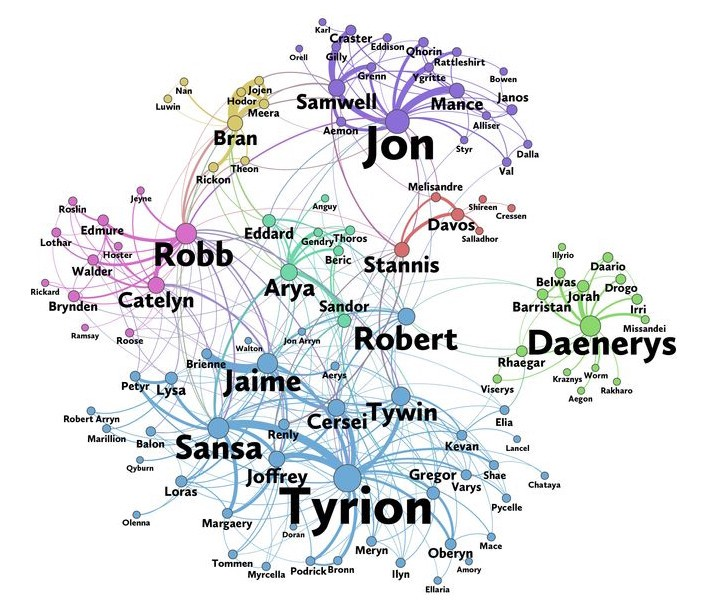

## References

- **Web Data Mining 2nd edition.** Liu. Springer. 2011.
  - Section 7.3